# 使用完全连接层估算简单线性回归的参数w、b

In [1]:
# 载入套件
import numpy as np 
import torch

## 产生随机资料

In [2]:
# 产生线性随机资料100笔，介于 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 资料加一点杂讯(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

## 定义模型

In [3]:
# 定义模型
def create_model(input_feature, output_feature):
    model = torch.nn.Sequential(
        torch.nn.Linear(input_feature, output_feature),
        torch.nn.Flatten(0, -1) # 所有维度转成一维 
    )
    return model

## 定义训练函数

In [4]:
def train(X, y, epochs=100, lr=1e-4):
    model = create_model(1, 1)

    # 定义损失函数
    loss_fn = torch.nn.MSELoss(reduction='sum') 

    # 定义优化器
    optimizer = torch.optim.Adam(model.parameters(), lr=lr) 

    loss_list, w_list, b_list=[], [], []
    for epoch in range(epochs):   # 执行训练周期
        y_pred = model(X)        # 预测值
        
        # 计算损失函数值
        # print(y_pred.shape, y.shape)
        MSE = loss_fn(y_pred, y) 
        
        # 梯度重置：改由优化器(Optimizer)控制
        optimizer.zero_grad()
        
        # 反向传导
        MSE.backward()  
        
        # 权重更新：改用 model.parameters 取代 w、b 逐一更新
        optimizer.step()
        
        # 记录训练结果
        if (epoch+1) % 1000 == 0 or epochs < 1000:
            w_list.append(model[0].weight[:, 0].item())  # w.item()：转成常数
            b_list.append(model[0].bias.item())
            loss_list.append(MSE.item())
        
    return w_list, b_list, loss_list

## 执行训练

In [5]:
# 使用不同学习率及更多的执行周期训练
X2, y2 = torch.FloatTensor(X.reshape(X.shape[0], 1)), torch.FloatTensor(y)
w_list, b_list, loss_list = train(X2, y2, epochs=10**5, lr=1e-5)

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.39351749420166016, b=1.7959932088851929


In [6]:
# 执行训练
coef = np.polyfit(X, y, deg=1)

# 取得 w、b 的最佳解
print(f'w={coef[0]}, b={coef[1]}')

w=0.9197501369391605, b=0.8390251732626816


In [7]:
from sklearn.linear_model import LinearRegression

X2 = X.reshape(X.shape[0], 1)

lr = LinearRegression()
lr.fit(X2, y)

lr.coef_[0], lr.intercept_

(0.9197501369391605, 0.839025173262673)

## 显示回归线

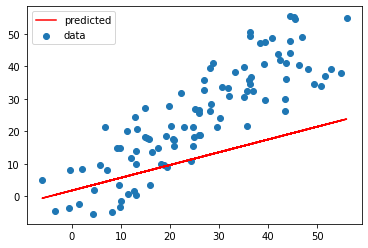

In [8]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, w_list[-1] * X + b_list[-1], 'r-', label='predicted')
plt.legend()

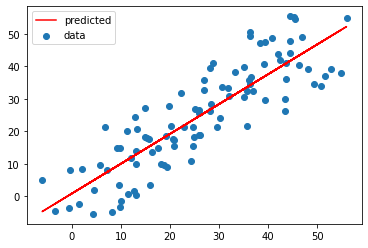

In [9]:
# NumPy 求得的回归线
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, coef[0] * X + coef[1], 'r-', label='predicted')
plt.legend()

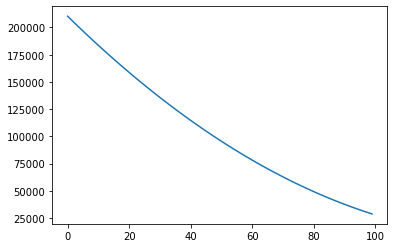

In [10]:
# 损失函数绘图
plt.plot(loss_list)

In [11]:
loss_list

[210291.75,
 207528.15625,
 204783.421875,
 202057.546875,
 199350.5625,
 196662.40625,
 193993.125,
 191342.703125,
 188711.140625,
 186101.296875,
 183514.953125,
 180947.375,
 178398.53125,
 175868.4375,
 173357.109375,
 170864.53125,
 168390.71875,
 165936.046875,
 163500.140625,
 161082.953125,
 158684.53125,
 156304.84375,
 153943.90625,
 151601.703125,
 149278.25,
 146973.53125,
 144687.578125,
 142420.375,
 140171.890625,
 137942.171875,
 135731.1875,
 133538.953125,
 131365.453125,
 129210.71875,
 127075.2890625,
 124961.09375,
 122865.609375,
 120788.796875,
 118730.6796875,
 116691.265625,
 114670.515625,
 112668.484375,
 110685.125,
 108720.4609375,
 106774.484375,
 104847.2109375,
 102938.6171875,
 101049.5,
 99179.6328125,
 97328.453125,
 95495.90625,
 93682.046875,
 91888.125,
 90112.8125,
 88356.1875,
 86618.1953125,
 84898.8671875,
 83198.46875,
 81516.9921875,
 79854.2890625,
 78210.3984375,
 76585.3203125,
 74979.0625,
 73391.765625,
 71823.1328125,
 70273.1328125,
 

In [12]:
w_list

[-0.5858436226844788,
 -0.5758896470069885,
 -0.5659356713294983,
 -0.5559816956520081,
 -0.5460277199745178,
 -0.5360737442970276,
 -0.5261197686195374,
 -0.5161657929420471,
 -0.5062118172645569,
 -0.4962690472602844,
 -0.4863448739051819,
 -0.47642070055007935,
 -0.4664965271949768,
 -0.45657235383987427,
 -0.44664818048477173,
 -0.4367240071296692,
 -0.42679983377456665,
 -0.4168756604194641,
 -0.4069514870643616,
 -0.39702731370925903,
 -0.3871031403541565,
 -0.37717896699905396,
 -0.3672547936439514,
 -0.3573306202888489,
 -0.34740644693374634,
 -0.3374822735786438,
 -0.32755810022354126,
 -0.3176339268684387,
 -0.3077097535133362,
 -0.29778558015823364,
 -0.2878614068031311,
 -0.27793723344802856,
 -0.268013060092926,
 -0.2580888867378235,
 -0.2481674700975418,
 -0.23825819790363312,
 -0.22834892570972443,
 -0.21843965351581573,
 -0.20853038132190704,
 -0.19862110912799835,
 -0.18871183693408966,
 -0.17880256474018097,
 -0.16889329254627228,
 -0.1589840203523636,
 -0.14907474815